Jakub Rękas, Kacper Szot

# Zadanie

## Cel

Celem zadania jest zastosowanie metody najmniejszych kwadratów do wytrenowania modelu służącego do predykcji czy dany nowotwór piersi jest złośliwy czy łagodny na podstawie określonego zestawu danych

W zadaniu wykorzystane zostały macierze pseudoodwrotne, które wylicza się ze wzoru $(1)$: $$A^{\dagger}=(A^TA)^{-1}A$$

Na podstawie macierzy $A^{\dagger}$ otrzymuje się wektor $w$ za pomocą wzoru $(2)$: $$w=A^{\dagger}b$$ gdzie $w$ to wektor wag dla poszczególnych cech w macierzy $A$.

## Biblioteki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

- `pandas` - bibiloteka służąca do odczytu danych i zebrania ich w *Data Frame*
- `numpy` - biblioteka służąca do obliczeń
- `matplotlib.pyplot` - biblioteka do rysowania histogramów
- `sklearn.preprocessing` - z biblioteki została wykorzystana funkcja `PolynomialFeatures` służąca do stworzenia macierzy kwadratowej

## Dane

In [2]:
labels = []
with open("breast-cancer.labels") as f:
    for line in f:
        labels.append(line.replace("\n",""))

In [3]:
train_data = pd.io.parsers.read_csv(filepath_or_buffer="breast-cancer-train.dat", names=labels)
train_data[["patient ID", "radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]].head()

,patient ID,radius (mean),perimeter (mean),area (mean),symmetry (mean)
0,842302,17.99,122.80,1001.0,0.2419
1,842517,20.57,132.90,1326.0,0.1812
2,84300903,19.69,130.00,1203.0,0.2069
3,84348301,11.42,77.58,386.1,0.2597
4,84358402,20.29,135.10,1297.0,0.1809


**Tab. 1** - tabela z przykładowymi danymi wykorzystanymi do trenowania modelu

In [4]:
validate_data = pd.io.parsers.read_csv(filepath_or_buffer="breast-cancer-validate.dat", names=labels)
validate_data[["patient ID", "radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]].head()

,patient ID,radius (mean),perimeter (mean),area (mean),symmetry (mean)
0,892438,19.53,129.50,1217.0,0.1792
1,892604,12.46,80.43,471.3,0.1781
2,89263202,20.09,134.70,1247.0,0.2249
3,892657,10.49,66.86,334.3,0.1482
4,89296,11.46,73.59,403.1,0.1411


**Tab. 2** - tabela z przykładowymi danymi wykorzystanymi do sprawdzenia skuteczności modelu

In [5]:
cases = len(validate_data)
print("Validation cases:", cases)

Validation cases: 260


Liczba rekordów w zestawie testowym wynosi 260.

## Histogramy

Histogramy przedstawiające częstości występowania wartości pól wybranych do trenowania modelu.

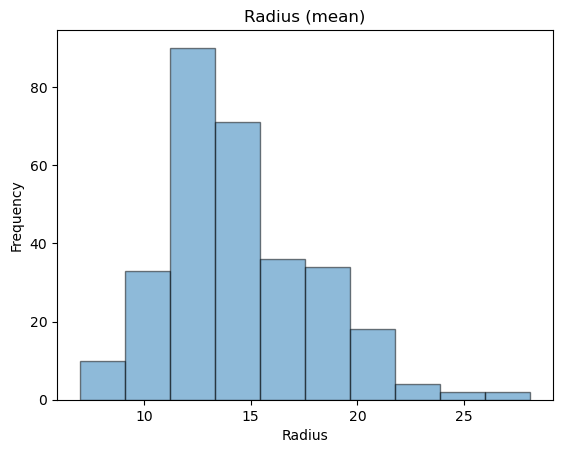

In [6]:
plt.title("Radius (mean)")
plt.xlabel("Radius")
plt.ylabel("Frequency")
plt.hist(train_data["radius (mean)"], ec="black", alpha=.5)
plt.show()

**Wyk. 1** - histogram dla kolumny *radius (mean)*

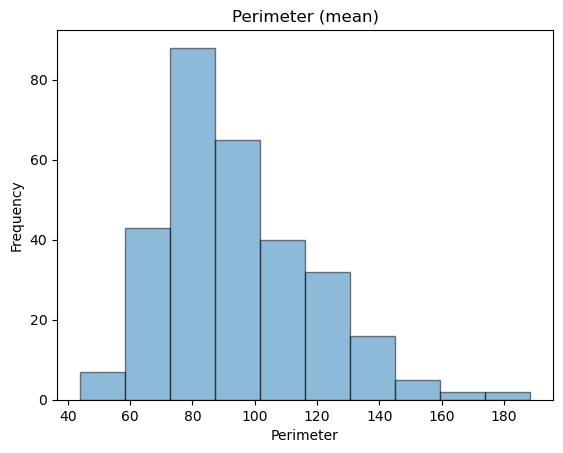

In [7]:
plt.title("Perimeter (mean)")
plt.xlabel("Perimeter")
plt.ylabel("Frequency")
plt.hist(train_data["perimeter (mean)"], ec="black", alpha=.5)
plt.show()

**Wyk. 2** - histogram dla kolumny *perimeter (mean)*

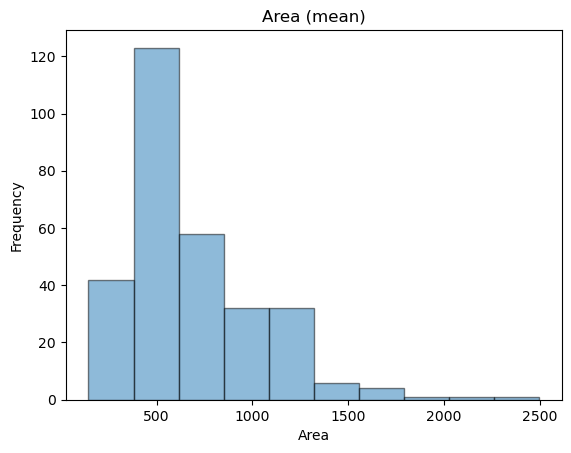

In [8]:
plt.title("Area (mean)")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.hist(train_data["area (mean)"], ec="black", alpha=.5)
plt.show()

**Wyk. 3** - histogram dla kolumny *area (mean)*

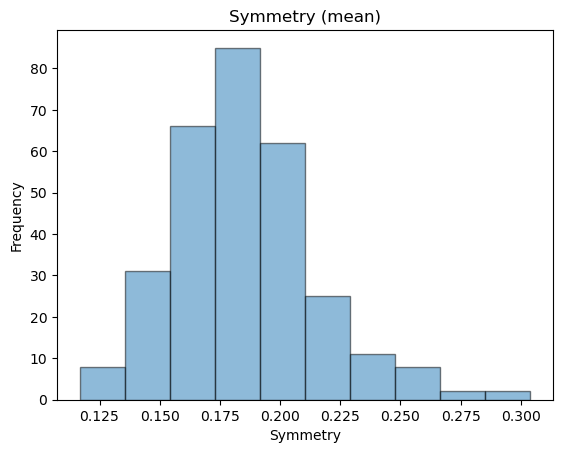

In [9]:
plt.title("Symmetry (mean)")
plt.xlabel("Symmetry")
plt.ylabel("Frequency")
plt.hist(train_data["symmetry (mean)"], ec="black", alpha=.5)
plt.show()

**Wyk. 4** - wykres dla kolumny *symmetry (mean)*

## Model Klasyfikatora oparty na Metodzie najmniejszych kwadratów

Do klasyfikacji złośliwości nowotworu w celu redukcji wymiarowości wykorzystamy tylko te cechy:

- *radius (mean)*,
- *perimeter (mean)*,
- *area (mean)*,
- *symmetry (mean)*

### Odwrócenie macierzy metodą `np.linalg.inv()`

W poniższum sposobie wektor $w$ jest wyliczony bezpośrednio przy użyciu wzoru $(2)$ oraz macierzy $A^{\dagger}$

**Macierz liniowa**

In [10]:
labels_lin = ["radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]

In [11]:
A_lin = np.matrix(train_data[labels_lin])

In [12]:
# Prepare results vector
b_train = np.where(train_data["Malignant/Benign"] == "M", [1], [-1])
b_validate = np.where(validate_data["Malignant/Benign"] == "M", [1], [-1])

Wektor $b$ to wektor zawierający informacje o tym czy nowotwór jest łagodny czy złośliwy. Wektor $b_{train}$ został stworzony na podstawie **Tab. 1** (dane testowe), natomiast wektor $b_{validate}$ na podstawie **Tab. 2** (dane walidacyjne). 

In [13]:
psuedoinverse_A_lin = np.linalg.inv((A_lin.T * A_lin)) * A_lin.T

Liniowa macierz pseudoodwrotna otrzymana ze wzoru $(1)$.

In [14]:
w_lin=psuedoinverse_A_lin*np.matrix(b_train).T

$w_{lin}$ to wektor wag macierzy liniowej otrzymany ze wzoru $(2)$.

In [15]:
validate_result_lin = np.sign(np.matrix(validate_data[labels_lin]) * w_lin).T

`validate_result_lin` - wektor testowy zawierający predykcje uzyskane dzięki $w_{lin}$ na walidacyjnym zestawie danych

In [16]:
correct_classification_lin = len(np.asarray(validate_result_lin == b_validate).nonzero()[0])
false_negative_lin = len(np.asarray(validate_result_lin < b_validate).nonzero()[0])
false_positive_lin = len(np.asarray(validate_result_lin > b_validate).nonzero()[0])

In [17]:
print("Correct classification:", correct_classification_lin)
print("False positives:", false_positive_lin)
print("False negatives:", false_negative_lin)
print("Accuracy:", correct_classification_lin/cases * 100)

Correct classification: 245
False positives: 8
False negatives: 7
Accuracy: 94.23076923076923


Z 260 rekordów w **Tab. 2** model wytrenowany na podstawie danych z **Tab. 1** dla macierzy liniowej poprawnie przewidział 245 przypadków nowotworu - skuteczność $94.2\%$. 8 razy wynik był fałszywie pozytywny, 7 razy fałszywie negatywny.

**Macierz kwadratowa**

Kroki trenowania modelu w przypadku macierzy kwadratowe są identyczne jak w przypadku macierzy liniowej.

Poniższy kod wykorzystuje funkcję `PolynomialFeatures` z biblioteki `sklearn.preprocessing` aby stworzyć macierz kwadratową.

In [18]:
#Prepare Data Transformator 
quad = PolynomialFeatures(degree=2, include_bias=False)
quad.feature_names_in = labels_lin
A_quad = np.matrix(quad.fit_transform(np.asarray(A_lin)))
validate_data_quad = np.matrix(quad.fit_transform(np.asarray(validate_data[labels_lin])))
labels_quad = quad.get_feature_names_out(labels_lin).tolist()

W macierzy kwadratowej powstały następujące pola

- *radius (mean)*
- *perimeter (mean)*
- *area (mean)*
- *symmetry (mean)*
- *radius (mean)$^2$*
- *radius (mean) perimeter (mean)*
- *radius (mean) area (mean)*
- *radius (mean) symmetry (mean)*
- *perimeter (mean)$^2$*
- *perimeter (mean) area (mean)*
- *perimeter (mean) symmetry (mean)*
- *area (mean)$^2$*
- *area (mean) symmetry (mean)*
- *symmetry (mean)$^2$*

In [19]:
psuedoinverse_A_quad = np.linalg.inv((A_quad.T * A_quad)) * A_quad.T

Macierz pseudoodwrotna wyliczona na podstawie wzoru $(1)$.

In [20]:
w_quad=psuedoinverse_A_quad*np.matrix(b_train).T

$w_{quad}$ - wektor wag wyliczony na podstawie wzoru $(2)$ oraz macierzy $A^{\dagger}$ dla reprezentacji kwadratowej.

In [21]:
validate_result_quad = np.sign(np.matrix(validate_data_quad) * w_quad).T

`validate_result_quad` - wektor testowy zawierający predykcje uzyskane dzięki $w_{quad}$ na walidacyjnym zestawie danych

In [22]:
correct_classification_quad = len(np.asarray(validate_result_quad == b_validate).nonzero()[0])
false_negative_quad = len(np.asarray(validate_result_quad < b_validate).nonzero()[0])
false_positive_quad = len(np.asarray(validate_result_quad > b_validate).nonzero()[0])

In [23]:
print("Correct classification:", correct_classification_quad)
print("False positives:", false_positive_quad)
print("False negatives:", false_negative_quad)
print("Accuracy:", correct_classification_quad/cases * 100)

Correct classification: 240
False positives: 15
False negatives: 5
Accuracy: 92.3076923076923


Z 260 rekordów w **Tab. 2** model wytrenowany na podstawie danych z **Tab. 1** dla macierzy kwadratowej poprawnie przewidział 240 przypadków nowotworu - skuteczność $92.3\%$. 15 razy wynik był fałszywie pozytywny, 5 razy fałszywie negatywny.

### Wyliczenie wektora $w$ za pomocą `np.linalg.solve()`

Teraz wektor $w$ wyliczany jest z równania otrzymanego za pomocą przekształczenia wzory $(1)$ w $(3)$: $$\left(A^TA\right)w=A^Tb$$

**Macierz liniowa**

In [24]:
labels_lin = ["radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]

In [25]:
A_lin = np.matrix(train_data[labels_lin])

In [26]:
# Prepare results vector
b_train = np.where(train_data["Malignant/Benign"] == "M", [1], [-1])
b_validate = np.where(validate_data["Malignant/Benign"] == "M", [1], [-1])

Wektor $b$ to wektor zawierający informacje o tym czy nowotwór jest łagodny czy złośliwy. Wektor $b_{train}$ został stworzony na podstawie **Tab. 1** (dane testowe), natomiast wektor $b_{validate}$ na podstawie **Tab. 2** (dane walidacyjne). 

In [27]:
prod_A = np.matmul(A_lin.T, A_lin)
prod_Ab = np.matmul(A_lin.T, b_train).T

In [28]:
w_lin = np.linalg.solve(prod_A, prod_Ab)

$w_{lin}$ to wektor wag macierzy liniowej otrzymany poprzez rozwiązanie równania $(3)$.

In [29]:
validate_result_lin = np.sign(np.matrix(validate_data[labels_lin]) * w_lin).T

`validate_result_lin` - wektor testowy zawierający predykcje uzyskane dzięki $w_{lin}$ na walidacyjnym zestawie danych

In [30]:
correct_classification_lin = len(np.asarray(validate_result_lin == b_validate).nonzero()[0])
false_negative_lin = len(np.asarray(validate_result_lin < b_validate).nonzero()[0])
false_positive_lin = len(np.asarray(validate_result_lin > b_validate).nonzero()[0])

In [31]:
print("Correct classification:", correct_classification_lin)
print("False positives:", false_positive_lin)
print("False negatives:", false_negative_lin)
print("Accuracy:", correct_classification_lin/cases * 100)

Correct classification: 245
False positives: 8
False negatives: 7
Accuracy: 94.23076923076923


Z 260 rekordów w **Tab. 2** model wytrenowany na podstawie danych z **Tab. 1** dla macierzy liniowej poprawnie przewidział 245 przypadków nowotworu - skuteczność $94.2\%$. 8 razy wynik był fałszywie pozytywny, 7 razy fałszywie negatywny.

**Macierz kwadratowa**

In [32]:
#Prepare Data Transformator 
quad = PolynomialFeatures(degree=2, include_bias=False)
quad.feature_names_in = labels_lin
A_quad = np.matrix(quad.fit_transform(np.asarray(A_lin)))
validate_data_quad = np.matrix(quad.fit_transform(np.asarray(validate_data[labels_lin])))
labels_quad = quad.get_feature_names_out(labels_lin).tolist()

In [33]:
prod_A = np.matmul(A_quad.T, A_quad)
prod_Ab = np.matmul(A_quad.T, b_train).T

In [34]:
w_quad = np.linalg.solve(prod_A, prod_Ab)

In [35]:
w_quad=psuedoinverse_A_quad*np.matrix(b_train).T

$w_{quad}$ - wektor wag wyliczony poprzez rozwiązanie układu równań $(3)$ dla reprezentacji kwadratowej.

In [36]:
validate_result_quad = np.sign(np.matrix(validate_data_quad) * w_quad).T

`validate_result_quad` - wektor testowy zawierający predykcje uzyskane dzięki $w_{quad}$ na walidacyjnym zestawie danych

In [37]:
correct_classification_quad = len(np.asarray(validate_result_quad == b_validate).nonzero()[0])
false_negative_quad = len(np.asarray(validate_result_quad < b_validate).nonzero()[0])
false_positive_quad = len(np.asarray(validate_result_quad > b_validate).nonzero()[0])

In [38]:
print("Correct classification:", correct_classification_quad)
print("False positives:", false_positive_quad)
print("False negatives:", false_negative_quad)
print("Accuracy:", correct_classification_quad/cases * 100)

Correct classification: 240
False positives: 15
False negatives: 5
Accuracy: 92.3076923076923


Z 260 rekordów w **Tab. 2** model wytrenowany na podstawie danych z **Tab. 1** dla macierzy kwadratowej poprawnie przewidział 240 przypadków nowotworu - skuteczność $92.3\%$. 15 razy wynik był fałszywie pozytywny, 5 razy fałszywie negatywny.

## Obliczenie współczynnika uwarunkowania macierzy

Aby wyliczyć współczynnik uwarunkowania $\text{cond}(A^TA)$ należy wykorzystać wzór $$\text{cond}(A^TA)=\text{cond}(A)^2$$

In [39]:
cond_lin = np.linalg.cond(A_lin) ** 2
cond_lin

828804275.0196037

In [40]:
cond_quad = np.linalg.cond(A_quad) ** 2
cond_quad

9.056816679082345e+17

Dla $A_{lin}$ - $\text{cond}(A^TA)=828804275.0196037$  
Dla $A_{quad}$ - $\text{cond}(A^TA)=9.056816679082345\cdot10^{17}$

# Wnioski

Pomimo uzyskania lepszych wyników przez model dla reprezentacji liniowej, w rzeczywistych zastosowaniach medycznych reprezentacja kwadratowa może okazać się lepszym rozwiązaniem. Wynika to z faktu, że fałszywe negatywy mogą stanowić znaczne ryzyko dla zdrowia pacjenta, natomiast fałszywe pozytywy mogą być wykluczone poprzez dokładniejsze badania.  
Wyniki są jednakowe niezależnie od sposobu uzyskania wektora wag $w$. Liczba fałszywych wyników pozytywnych oraz fałszywych wyników negatywnych jest identyczna w przypadku użycia `np.linalg.inv()` i `np.linalg.solve()`.